In [253]:
%run functions_wiki.py

In [304]:
# plt.rc({'figsize' :(20,20)})

In [203]:
data = pd.read_csv("../../data/ITunes_Store_3.txt", sep="\t")
data.head(2)

,_content_model,_parent_id,_sha1,anon,comment,minor,revid,rollbacktoken,text,timestamp,user
0,wikitext,809643144,db38419b6247d65883fc8eaa3a1d3bc15d2cc976,True,NaN,False,811497412,NaN,{{Use mdy dates|date=June 2014}}\n{{Outdated a...,2017-11-22 00:46:55,2600:8807:1180:3C70:5D61:9143:E9CE:E2B3
1,wikitext,807533073,2bf1bf27ef0c2213e707692f89f1b3ebcef38d58,False,Rescuing 2 sources and tagging 0 as dead. #IAB...,False,809643144,NaN,{{Use mdy dates|date=June 2014}}\n{{Outdated a...,2017-11-10 13:38:08,InternetArchiveBot


In [204]:
len(data)

3874

In [89]:
def get_time_intervals(revisions):
    revisions['timestamp'] = pd.to_datetime(revisions['timestamp'])
    revisions = revisions.sort_values('timestamp', ascending=False)
    times = revisions['timestamp'].reset_index(drop=True)
    time_intervals = []
    for i in range(len(times)-1):
        time_intervals.append(times[i] - times[i+1])
    time_intervals = [c.total_seconds() for c in time_intervals]  # count in seconds
    return pd.Series(time_intervals)

In [90]:
def select_windows(revision_group, window_no):
    return pd.concat([c[1] for c in list(g)[window_no:window_no+4]])

In [210]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.sort_values('timestamp', ascending=False)
g = data.groupby(pd.Grouper(key='timestamp', freq='Q'))
print('This page existed for %s years' %(len(g)/4))
intervals = {}
if len(g)>=5:
    for i in range(len(g)-4):
        intervals[i] = get_time_intervals(select_windows(g, i))
else:
    print("too short artile life")

This page existed for 14.75 years


In [211]:
len(intervals)

55

In [288]:
# def scatter_loglog(intervals):
#     buf = io.BytesIO()
#     hist, bins = np.histogram(intervals,100)
#     if hist.any():
#         fig = plt.figure()
#         ax = plt.gca()
#         ax.set_yscale('log')
#         ax.set_xscale('log')
#         ax.scatter(bins[:-1],hist)
#         plt.savefig(buf)
#         return buf
#     else:
#         plt.figure()
#         plt.savefig(buf)
#         return buf
        

In [206]:
def scatter_loglog(intervals):
    nrows = len(intervals) // 5 +1
    fig, axes = plt.subplots(nrows,5,sharex=True, sharey=True,figsize=(12,15))
    for i in range(len(intervals)):
        hist, bins = np.histogram(intervals[i],100)
        if hist.any():
            axes[i//5, i%5].set_yscale('log')
            axes[i//5, i%5].set_xscale('log')
            axes[i//5, i%5].scatter(bins[1:],hist,alpha=0.5,s=10)
#             axes[i//5, i%5].plot(np.log(bins[:-1]),np.log(hist))
    plt.show()

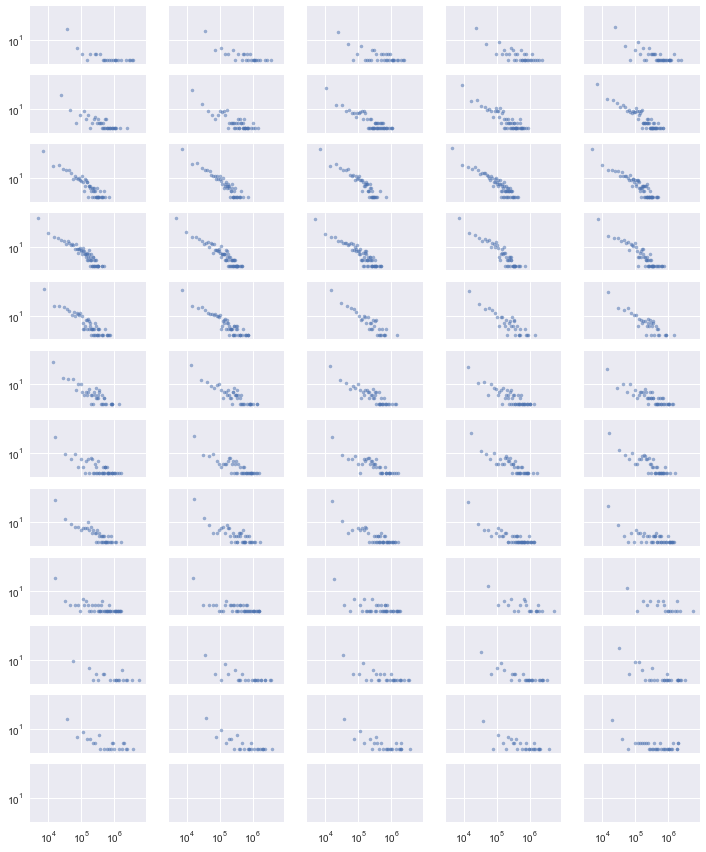

In [212]:
scatter_loglog(intervals)

In [16]:
import powerlaw

In [170]:
def compare_dist(fit):
    R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
    if R>0:
        return 'powerlaw',p
    else:
        return 'exponential',p

In [235]:
alpha = {}
dist = {}
P = {}
for i in range(len(intervals)):
    if len(intervals[i])>10:
    #     fit = powerlaw.Fit(intervals[i])
        fit = powerlaw.Fit(intervals[i], xmin=100)
#         fit = powerlaw.Fit(intervals[i], xmin=0.01)
    #     print("power law fit",fit.power_law.alpha)
        alpha[i] = fit.power_law.alpha
        dist[i],P[i] = compare_dist(fit)
    else:
        alpha[i], dist[i], P[i] = 'na','na','na'

  (Theoretical_CDF * (1 - Theoretical_CDF))

  (Theoretical_CDF * (1 - Theoretical_CDF))



In [236]:
dist

{0: 'powerlaw',
 1: 'exponential',
 2: 'exponential',
 3: 'exponential',
 4: 'exponential',
 5: 'exponential',
 6: 'powerlaw',
 7: 'powerlaw',
 8: 'powerlaw',
 9: 'exponential',
 10: 'exponential',
 11: 'exponential',
 12: 'exponential',
 13: 'exponential',
 14: 'powerlaw',
 15: 'exponential',
 16: 'exponential',
 17: 'exponential',
 18: 'exponential',
 19: 'exponential',
 20: 'exponential',
 21: 'exponential',
 22: 'exponential',
 23: 'exponential',
 24: 'exponential',
 25: 'powerlaw',
 26: 'exponential',
 27: 'exponential',
 28: 'exponential',
 29: 'exponential',
 30: 'powerlaw',
 31: 'powerlaw',
 32: 'powerlaw',
 33: 'powerlaw',
 34: 'powerlaw',
 35: 'powerlaw',
 36: 'powerlaw',
 37: 'powerlaw',
 38: 'powerlaw',
 39: 'powerlaw',
 40: 'powerlaw',
 41: 'powerlaw',
 42: 'powerlaw',
 43: 'powerlaw',
 44: 'powerlaw',
 45: 'exponential',
 46: 'exponential',
 47: 'exponential',
 48: 'exponential',
 49: 'powerlaw',
 50: 'exponential',
 51: 'powerlaw',
 52: 'powerlaw',
 53: 'powerlaw',
 54: 

In [273]:
# fig, axes = plt.subplots(3,5,sharex='col', sharey='row',figsize=(10,8))
# for i in range(len(intervals)):
#     fit = powerlaw.Fit(intervals[i])
#     bins, empirical = fit.ccdf()
#     power_law, exponential = fit.power_law.ccdf(), fit.exponential.ccdf()
#     axes[i//5, i%5].plot(bins, empirical, color='b', linewidth=2)
#     axes[i//5, i%5].plot(bins, power_law[:len(bins)], color='r', linestyle='--')
#     axes[i//5, i%5].plot(bins, exponential[:len(bins)], color='g', linestyle='--')
#     axes[i//5, i%5].text(-0.1, 1.1, dist[i],transform=ax.transAxes, size=20, weight='bold')
#     axes[i//5, i%5].set_xscale('log')
#     axes[i//5, i%5].set_yscale('log')
# #     ccdf.set_ylabel(u"p(X≥x)")
# # n = len(fig.axes)


In [237]:
def compare_fitness(intervals):
    nrows = len(intervals) // 5 +1
    fig, axes = plt.subplots(nrows,5,sharex=True, sharey=True,figsize=(12,15))
    i = 0
    for a,b in enumerate(axes):
        for c, ax in enumerate(b):
            fit = powerlaw.Fit(intervals[i], xmin=100)
            bins, empirical = fit.ccdf()
            power_law, exponential = fit.power_law.ccdf(), fit.exponential.ccdf()
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.scatter(bins, empirical, color='b', s=3)
            ax.plot(bins, power_law[:len(bins)], color='r', linestyle='--')
            ax.plot(bins, exponential[:len(bins)], color='g', linestyle='--')
            ax.text(-0.1, 1.1, dist[i],transform=ax.transAxes, size=15, weight='bold')
            i+=1
            if i == len(intervals):
                break
            else:
                pass
        if i== len(intervals):
            break
        else:
            pass
    plt.show()

  (Theoretical_CDF * (1 - Theoretical_CDF))

  (Theoretical_CDF * (1 - Theoretical_CDF))



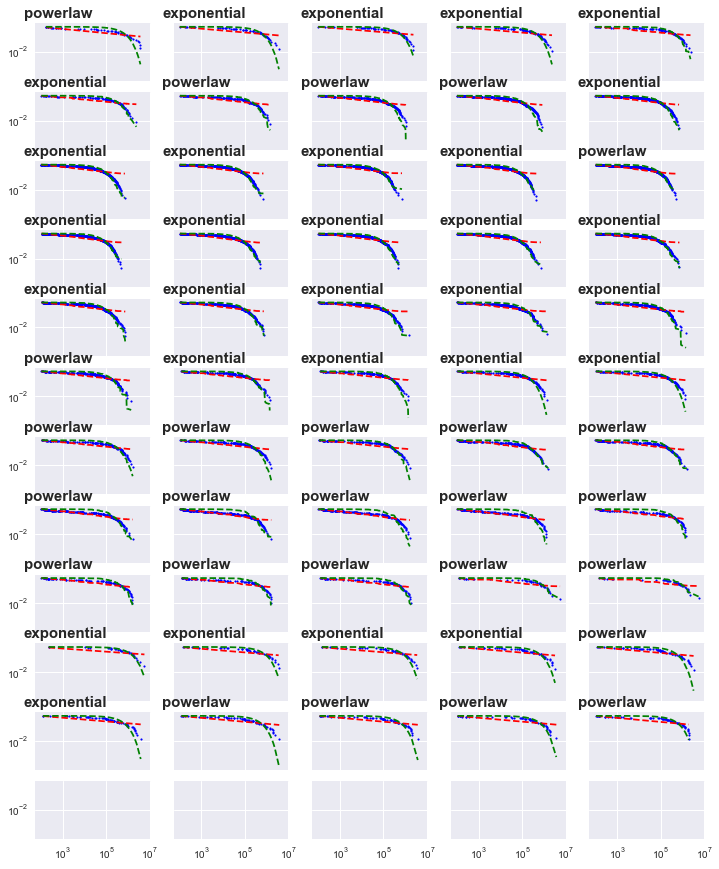

In [238]:
compare_fitness(intervals)

In [322]:
from scipy.stats import entropy

In [323]:
def parse_revision_window(data,article_name,quality):
    history = {}
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data = data.sort_values('timestamp', ascending=False)
    g = data.groupby(pd.Grouper(key='timestamp', freq='Q'))
    print('This page existed for %s years' %(len(g)/4))
    if len(g)>=5:  # only analyze article life longer than 1.25 years
        for i in range(len(g)-4):
            default = {'alpha': 'NA', 'fitness_R':'NA', 'fitness_p':'NA', 'fit':'NA', 'editor_concentration':'NA',
                      'burstiness':'NA', 'submission':'NA', 'persistent_contribs':'NA','top_contributors':'NA',
                      'entropy':'NA'}
            tmp = select_windows(g, i)  # get revision 
            intervals = get_time_intervals(tmp)
            if len(intervals)>10:  # 10 as the min intervals count
                fit = powerlaw.Fit(intervals, xmin=100)
                default['alpha'] = fit.power_law.alpha
                default['fitness_R'], default['fitness_p'] = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
                if default['fitness_R'] > 0:
                    default['fit'] = 'power_law'
                else:
                    default['fit'] = 'exponential'
                users = tmp['user'].value_counts()
                default['entropy'] = entropy(users)
                default['top_contributors'] = users.index[:3].values
                default['editor_concentration'] = gini(users.values.astype(float))
                default['burstiness'] = cal_burstiness(intervals)
                default['submission'] = len(tmp)
                text1, text2 = tmp['text'].values[0], tmp['text'].values[-1]
                default['persistent_contribs'] = getPersistentContribs(text1, text2)
            history[i] = default
    else:
        print("too short artile life")
    history = pd.DataFrame(history).T
    history['article_name'] = article_name
    history['quality'] = quality
    return history

In [324]:
%time a = parse_revision_window(data, 'ITunes_Store' , 3)

  (Theoretical_CDF * (1 - Theoretical_CDF))

  (Theoretical_CDF * (1 - Theoretical_CDF))



This page existed for 14.75 years
CPU times: user 2.42 s, sys: 696 ms, total: 3.11 s
Wall time: 5.42 s


In [307]:
def Jaccard(x,y):
    return len(set(x)&set(y))/len(set(x)|set(y))

In [332]:
distance = [0]
for i in range(1, len(a)):
    distance.append(Jaccard(a['top_contributors'][i-1],a['top_contributors'][i]))

a['jaccard'] = np.where(np.array(distance) < 0.5, 1, 0)

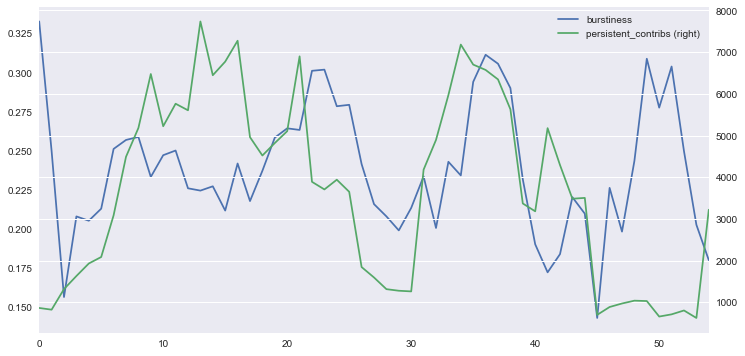

In [321]:
a[['burstiness','persistent_contribs']].plot(secondary_y=['persistent_contribs'])
plt.show()

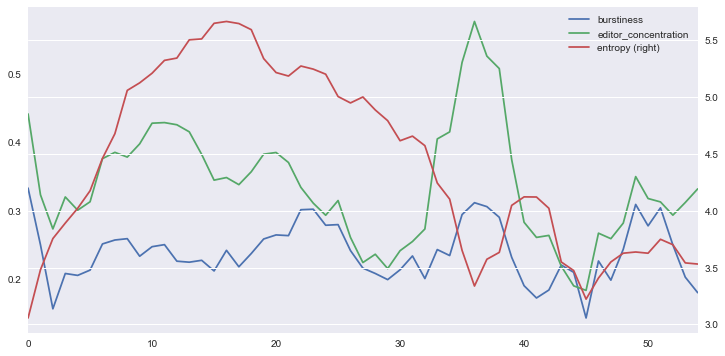

In [330]:
a[['burstiness','editor_concentration','entropy']].plot(secondary_y=['entropy'])
plt.show()

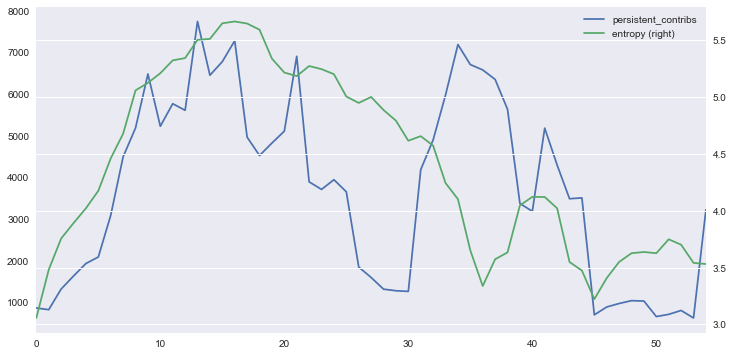

In [331]:
a[['persistent_contribs','entropy']].plot(secondary_y=['entropy'])
plt.show()

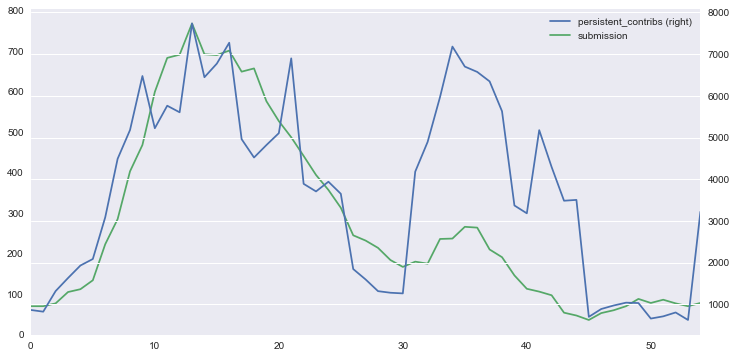

In [320]:
a[['persistent_contribs','submission']].plot(secondary_y=['persistent_contribs'])
plt.show()

In [152]:
%run ~/GoogleDrive/research/wikipedia_shared/code/Christian/quality_helpers.py

VERBOSE:pywiki:Found 1 wikipedia:en processes running, including this one.


In [154]:
tmp = select_windows(g,10)['text'].values
text1, text2 = tmp[0], tmp[-1]

In [239]:
getPersistentContribs(text1, text2)

3996

In [333]:
a

,alpha,burstiness,editor_concentration,entropy,fit,fitness_R,fitness_p,persistent_contribs,submission,top_contributors,article_name,quality,jaccard
0,1.17079,0.332643,0.441071,3.0567,power_law,2.24832,0.0245559,867,70,"[TakuyaMurata, Evercat, IKenny]",ITunes_Store,3,1
1,1.15171,0.249729,0.322857,3.48083,exponential,-0.0797541,0.936433,826,70,"[IKenny, Ellmist, TakuyaMurata]",ITunes_Store,3,0
2,1.14446,0.156211,0.272987,3.75522,exponential,-1.86745,0.0618394,1320,77,"[Ellmist, Ryguillian, TakuyaMurata]",ITunes_Store,3,0
3,1.1543,0.207835,0.31975,3.89133,exponential,-0.780281,0.435226,1633,105,"[TakuyaMurata, 66.87.84.55, Dale Arnett]",ITunes_Store,3,1
4,1.15737,0.205069,0.300373,4.02136,exponential,-0.478384,0.632377,1933,112,"[66.87.84.55, Dale Arnett, TakuyaMurata]",ITunes_Store,3,0
5,1.16374,0.212788,0.312696,4.17581,exponential,-0.280451,0.779131,2089,134,"[68.199.218.109, TakuyaMurata, 66.87.84.55]",ITunes_Store,3,0
6,1.17887,0.25104,0.375702,4.46085,power_law,0.554899,0.578964,3088,223,"[TakuyaMurata, 68.199.218.109, Elfguy]",ITunes_Store,3,0
7,1.18815,0.256777,0.384942,4.6775,power_law,0.940644,0.346887,4491,285,"[AlistairMcMillan, TakuyaMurata, 24.91.73.141]",ITunes_Store,3,1
8,1.19427,0.258735,0.378002,5.05869,power_law,0.0684875,0.945398,5182,403,"[AlistairMcMillan, TakuyaMurata, 24.91.73.141]",ITunes_Store,3,0
9,1.19485,0.233096,0.397349,5.12506,exponential,-1.17135,0.241457,6476,468,"[Nehrams2020, AlistairMcMillan, 24.91.73.141]",ITunes_Store,3,0
